<a href="https://colab.research.google.com/github/Mohadese-ghayoomi/EulerProjectSolution/blob/master/Copy_of_ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Tanya carina ()
*   Mohadese Ghayoomi Javinani (225829)

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from time import time
from datetime import datetime
import io
import itertools
from packaging import version
from six.moves import range

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
from google.colab import drive; drive.mount('/content/drive')
import os
os.getcwd()
%cd /content/drive/My Drive/Colab Notebooks
from datasets import MNISTDataset

TensorFlow version:  2.2.0-rc3
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# **shuffle/repeat/batch orderings**

In [0]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
# normalize the images to [0, 1] 
# reshape images from (28, 28) to (784,)
train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 784))
test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 784))
# convert labels to int32
train_lbls = train_lbls.astype(np.int32)
test_lbls = test_lbls.astype(np.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))
test_dataset = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls)) 

BATCH_SIZE=100
SHUFFLE_SIZE =5
REPEAT_SIZE =2
train_dataset = train_dataset.shuffle(SHUFFLE_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_SIZE)
train_dataset = train_dataset.repeat(REPEAT_SIZE)
test_dataset = test_dataset.repeat(REPEAT_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'eight', 'nine', 'ten']


In [0]:
model = tf.keras.Sequential([
#tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [5]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2397 - sparse_categorical_accuracy: 0.9326
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1008 - sparse_categorical_accuracy: 0.9718
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0657 - sparse_categorical_accuracy: 0.9816
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9868
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0353 - sparse_categorical_accuracy: 0.9902
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9930
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9950
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0156 - sparse_categorical_accuracy: 0.9964
Epoch 9/10
1200/1200 [==========

In [6]:
model.evaluate(test_dataset)

200/200 [==============================] - 0s 2ms/step - loss: 0.1187 - sparse_categorical_accuracy: 0.9749


[0.1187371090054512, 0.9749000072479248]

# **repeat/shuffle/batch orderings**

In [0]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
# normalize the images to [0, 1] 
# reshape images from (28, 28) to (784,)
train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 784))
test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 784))
# convert labels to int32
train_lbls = train_lbls.astype(np.int32)
test_lbls = test_lbls.astype(np.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))
test_dataset = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls)) 

BATCH_SIZE=100
SHUFFLE_SIZE =5
REPEAT_SIZE =2

train_dataset = train_dataset.repeat(REPEAT_SIZE)
test_dataset = test_dataset.repeat(REPEAT_SIZE)
train_dataset = train_dataset.shuffle(SHUFFLE_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'eight', 'nine', 'ten']


In [8]:
model = tf.keras.Sequential([
#tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
model.fit(train_dataset, epochs=10)


Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2379 - sparse_categorical_accuracy: 0.9334
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0991 - sparse_categorical_accuracy: 0.9718
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0647 - sparse_categorical_accuracy: 0.9816
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0465 - sparse_categorical_accuracy: 0.9870
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0348 - sparse_categorical_accuracy: 0.9906
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9932
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9952
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0155 - sparse_categorical_accuracy: 0.9965
Epoch 9/10
1200/1200 [==========

In [9]:
model.evaluate(test_dataset)

200/200 [==============================] - 0s 2ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0.9754


[0.1153411865234375, 0.9753999710083008]

# **shuffle/batch/repeat orderings**

In [10]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
# normalize the images to [0, 1] 
# reshape images from (28, 28) to (784,)
train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 784))
test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 784))
# convert labels to int32
train_lbls = train_lbls.astype(np.int32)
test_lbls = test_lbls.astype(np.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))
test_dataset = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls)) 

BATCH_SIZE=100
SHUFFLE_SIZE =5
REPEAT_SIZE =2

train_dataset = train_dataset.shuffle(SHUFFLE_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.repeat(REPEAT_SIZE)
test_dataset = test_dataset.repeat(REPEAT_SIZE)


class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'eight', 'nine', 'ten']

model = tf.keras.Sequential([
#tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
model.fit(train_dataset, epochs=10)


Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2382 - sparse_categorical_accuracy: 0.9336
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0.9714
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9811
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9866
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0357 - sparse_categorical_accuracy: 0.9906
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9930
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0208 - sparse_categorical_accuracy: 0.9952
Epoch 8/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0161 - sparse_categorical_accuracy: 0.9965
Epoch 9/10
1200/1200 [==========

In [11]:
model.evaluate(test_dataset)

200/200 [==============================] - 0s 2ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9739


[0.1171913743019104, 0.9739000201225281]

# **batch/repeat/shuffle/ orderings**

In [12]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
# normalize the images to [0, 1] 
# reshape images from (28, 28) to (784,)
train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 784))
test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 784))
# convert labels to int32
train_lbls = train_lbls.astype(np.int32)
test_lbls = test_lbls.astype(np.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))
test_dataset = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls)) 

BATCH_SIZE=100
SHUFFLE_SIZE =5
REPEAT_SIZE =2

train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.repeat(REPEAT_SIZE)
test_dataset = test_dataset.repeat(REPEAT_SIZE)
train_dataset = train_dataset.shuffle(SHUFFLE_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_SIZE)


class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'eight', 'nine', 'ten']

model = tf.keras.Sequential([
#tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
model.fit(train_dataset, epochs=10)


Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2328 - sparse_categorical_accuracy: 0.9354
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0939 - sparse_categorical_accuracy: 0.9727
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9819
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0447 - sparse_categorical_accuracy: 0.9871
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0340 - sparse_categorical_accuracy: 0.9902
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0.9930
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0197 - sparse_categorical_accuracy: 0.9948
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0153 - sparse_categorical_accuracy: 0.9963
Epoch 9/10
1200/1200 [==========

In [13]:
model.evaluate(test_dataset)

200/200 [==============================] - 0s 2ms/step - loss: 0.1061 - sparse_categorical_accuracy: 0.9769


[0.10612091422080994, 0.9768999814987183]

# **batch/shuffle/repeat orderings**

In [14]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
# normalize the images to [0, 1] 
# reshape images from (28, 28) to (784,)
train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 784))
test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 784))
# convert labels to int32
train_lbls = train_lbls.astype(np.int32)
test_lbls = test_lbls.astype(np.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))
test_dataset = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls)) 

BATCH_SIZE=100
SHUFFLE_SIZE =5
REPEAT_SIZE =2

train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.shuffle(SHUFFLE_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_SIZE)
train_dataset = train_dataset.repeat(REPEAT_SIZE)
test_dataset = test_dataset.repeat(REPEAT_SIZE)


class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'eight', 'nine', 'ten']

model = tf.keras.Sequential([
#tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
model.fit(train_dataset, epochs=10)



Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2401 - sparse_categorical_accuracy: 0.9323
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0999 - sparse_categorical_accuracy: 0.9704
Epoch 3/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0660 - sparse_categorical_accuracy: 0.9808
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0483 - sparse_categorical_accuracy: 0.9858
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0363 - sparse_categorical_accuracy: 0.9898
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0276 - sparse_categorical_accuracy: 0.9926
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0210 - sparse_categorical_accuracy: 0.9946
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0163 - sparse_categorical_accuracy: 0.9957
Epoch 9/10
1200/1200 [==========

In [15]:
model.evaluate(test_dataset)


200/200 [==============================] - 0s 2ms/step - loss: 0.1073 - sparse_categorical_accuracy: 0.9760


[0.10730396956205368, 0.9760000109672546]

# **repeat/batch/shuffle/ orderings**

In [16]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
# normalize the images to [0, 1] 
# reshape images from (28, 28) to (784,)
train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 784))
test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 784))
# convert labels to int32
train_lbls = train_lbls.astype(np.int32)
test_lbls = test_lbls.astype(np.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))
test_dataset = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls)) 

BATCH_SIZE=100
SHUFFLE_SIZE =5
REPEAT_SIZE =2


train_dataset = train_dataset.repeat(REPEAT_SIZE)
test_dataset = test_dataset.repeat(REPEAT_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.shuffle(SHUFFLE_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_SIZE)

class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'eight', 'nine', 'ten']

model = tf.keras.Sequential([
#tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
model.fit(train_dataset, epochs=10)


Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2433 - sparse_categorical_accuracy: 0.9318
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1017 - sparse_categorical_accuracy: 0.9702
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9810
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9864
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0357 - sparse_categorical_accuracy: 0.9900
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9927
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0208 - sparse_categorical_accuracy: 0.9946
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9961
Epoch 9/10
1200/1200 [==========

In [17]:
model.evaluate(test_dataset)


200/200 [==============================] - 0s 2ms/step - loss: 0.1120 - sparse_categorical_accuracy: 0.9743


[0.11202209442853928, 0.9743000268936157]

In [0]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))
# Names of the integer classes, i.e., 0 -> T-short/top, 1 -> Trouser, etc.
class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'eight', 'nine', 'ten']
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

# **FAIL1**
The error in this file is solved using Hyperparameter tuning.
A few reasons for the cause of NaN errors is: a) Cross_ entropy or b) large number of connected layers.
The number of connected layers in this example was 8. By tuning the hyperparameter, it was found that the layers above 4 caused an overflow leading to the NaN error.

In [30]:
# define the model first, from input to output

# this is a super deep model, cool!

n_units = 100
n_layers = 4
w_range = 0.4

# just set up a "chain" of hidden layers
layers = []

for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 18.911483764648438 Accuracy: 0.09375
Loss: 0.5633935332298279 Accuracy: 0.8046875
Starting new epoch...
Loss: 0.3810024857521057 Accuracy: 0.8828125
Loss: 0.3259965181350708 Accuracy: 0.91015625
Starting new epoch...
Loss: 0.37897396087646484 Accuracy: 0.88671875
Loss: 0.3076930642127991 Accuracy: 0.91796875
Starting new epoch...
Loss: 0.24392898380756378 Accuracy: 0.92578125
Loss: 0.1995052993297577 Accuracy: 0.9375
Loss: 0.3295733332633972 Accuracy: 0.90625
Starting new epoch...
Loss: 0.2264748215675354 Accuracy: 0.9453125
Loss: 0.16648049652576447 Accuracy: 0.95703125
Starting new epoch...
Loss: 0.14051471650600433 Accuracy: 0.9375
Loss: 0.17480666935443878 Accuracy: 0.94921875
Starting new epoch...
Loss: 0.1235399842262268 Accuracy: 0.96875
Loss: 0.1757916808128357 Accuracy: 0.953125
Loss: 0.1502392739057541 Accuracy: 0.95703125
Starting new epoch...
Loss: 0.1830947995185852 Accuracy: 0.9296875
Loss: 0.11645284295082092 Accuracy: 0.95703125
Starting new epoch...
Loss: 0.12649

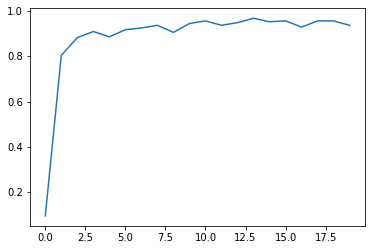

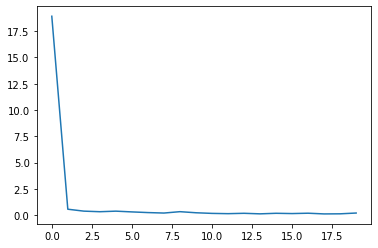

In [31]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail2**
This error was found to be a vanishing gradient problem which is usually solved by ReLU.
The vanishing gradient problem arises due to the nature of the back-propagation optimization which occurs in neural network training . The weight and bias values in the various layers within a neural network are updated each optimization iteration by stepping in the direction of the gradient of the weight/bias values with respect to the loss function. The vanishing gradient problem is particularly problematic with sigmoid activation functions. This can occur when the weights of our networks are initialized poorly – with too-large negative and positive values. These too-large values saturate the input to the sigmoid and pushes the derivatives into the small valued regions.

In [32]:
# define the model first, from input to output


# this is a super deep model, cool!
n_units = 100
n_layers = 8
w_range = 0.1

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense( 
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 2.302560329437256 Accuracy: 0.0625
Loss: 2.3017725944519043 Accuracy: 0.09375
Loss: 2.3024721145629883 Accuracy: 0.09765625
Starting new epoch...
Loss: 2.299838066101074 Accuracy: 0.11328125
Loss: 2.2985033988952637 Accuracy: 0.11328125
Starting new epoch...
Loss: 2.3021488189697266 Accuracy: 0.109375
Loss: 2.29785418510437 Accuracy: 0.11328125
Starting new epoch...
Loss: 2.2979800701141357 Accuracy: 0.12109375
Loss: 2.2931742668151855 Accuracy: 0.11328125
Loss: 2.2788357734680176 Accuracy: 0.125
Starting new epoch...
Loss: 1.9659931659698486 Accuracy: 0.2578125
Loss: 1.7457234859466553 Accuracy: 0.296875
Starting new epoch...
Loss: 1.2692844867706299 Accuracy: 0.515625
Loss: 1.0352996587753296 Accuracy: 0.59375
Starting new epoch...
Loss: 0.7558271288871765 Accuracy: 0.73828125
Loss: 0.5208376049995422 Accuracy: 0.83203125
Loss: 0.4194156527519226 Accuracy: 0.890625
Starting new epoch...
Loss: 0.5466054081916809 Accuracy: 0.85546875
Loss: 0.5107297897338867 Accuracy: 0.8828125
S

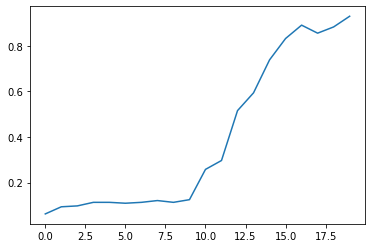

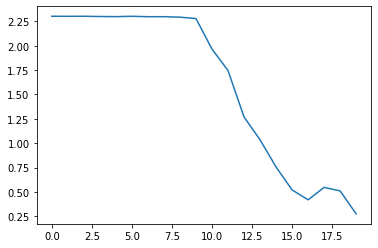

In [33]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail3**

relu---> tanh   
the tanh function is also lesser-used for hidden layers, although some specific models use the tanh function too. Some problems with the output needs of range -1 and 1 use tanh in the output node.

In [24]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.tanh,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))

Loss: 2.3017003536224365 Accuracy: 0.1328125
Loss: 2.1898269653320312 Accuracy: 0.203125
Loss: 1.7943511009216309 Accuracy: 0.27734375
Starting new epoch...
Loss: 1.6510834693908691 Accuracy: 0.3125
Loss: 1.5149434804916382 Accuracy: 0.453125
Starting new epoch...
Loss: 1.4579929113388062 Accuracy: 0.44140625
Loss: 1.2694480419158936 Accuracy: 0.484375
Starting new epoch...
Loss: 1.0153653621673584 Accuracy: 0.6015625
Loss: 0.8445215225219727 Accuracy: 0.75
Loss: 0.7343859672546387 Accuracy: 0.77734375
Starting new epoch...
Loss: 0.5028834342956543 Accuracy: 0.859375
Loss: 0.5328559875488281 Accuracy: 0.84765625
Starting new epoch...
Loss: 0.3644587993621826 Accuracy: 0.890625
Loss: 0.3315804600715637 Accuracy: 0.91015625
Loss: 0.39380723237991333 Accuracy: 0.890625
Starting new epoch...
Loss: 0.35360056161880493 Accuracy: 0.8984375
Loss: 0.33387380838394165 Accuracy: 0.90625
Starting new epoch...
Loss: 0.3183617889881134 Accuracy: 0.9296875
Loss: 0.30611610412597656 Accuracy: 0.914062

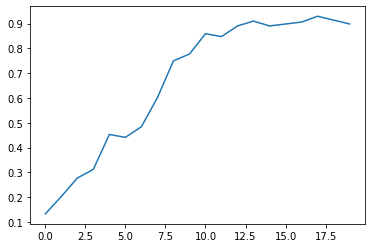

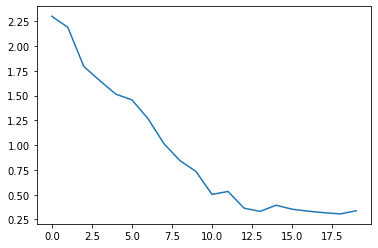

In [25]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail4**
Standard deviation

In [26]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    # I hear adding random noise to inputs helps with generalization!
    img_batch = img_batch + tf.random.normal(tf.shape(img_batch), stddev=0)
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 2.3025898933410645 Accuracy: 0.08984375
Loss: 2.3033506870269775 Accuracy: 0.07421875
Starting new epoch...
Loss: 2.3050894737243652 Accuracy: 0.1015625
Loss: 2.3015761375427246 Accuracy: 0.10546875
Starting new epoch...
Loss: 2.297532081604004 Accuracy: 0.1328125
Loss: 2.2851550579071045 Accuracy: 0.15625
Starting new epoch...
Loss: 1.6238198280334473 Accuracy: 0.42578125
Loss: 0.7561625242233276 Accuracy: 0.734375
Loss: 0.6886032819747925 Accuracy: 0.7890625
Starting new epoch...
Loss: 0.584841787815094 Accuracy: 0.83203125
Loss: 0.6003267765045166 Accuracy: 0.82421875
Starting new epoch...
Loss: 0.5602169036865234 Accuracy: 0.8359375
Loss: 0.49479374289512634 Accuracy: 0.84765625
Starting new epoch...
Loss: 0.4082978367805481 Accuracy: 0.86328125
Loss: 0.3278926610946655 Accuracy: 0.90625
Loss: 0.34562617540359497 Accuracy: 0.90234375
Starting new epoch...
Loss: 0.21082717180252075 Accuracy: 0.92578125
Loss: 0.22490519285202026 Accuracy: 0.9375
Starting new epoch...
Loss: 0.29

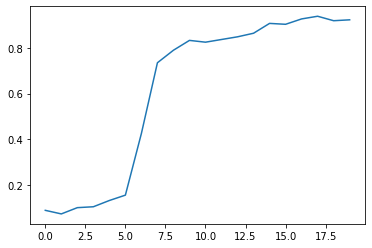

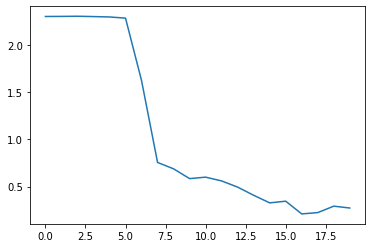

In [27]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail5**

In [28]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the softmax output layer :))
layers.append(tf.keras.layers.Dense(
    10, activation=tf.nn.softmax,
    kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                     maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))

Loss: 2.3025870323181152 Accuracy: 0.109375
Loss: 2.302570343017578 Accuracy: 0.1015625
Loss: 2.302490711212158 Accuracy: 0.1328125
Starting new epoch...
Loss: 2.3024532794952393 Accuracy: 0.12109375
Loss: 2.3026468753814697 Accuracy: 0.08203125
Starting new epoch...
Loss: 2.302151918411255 Accuracy: 0.1328125
Loss: 2.302273750305176 Accuracy: 0.1328125
Starting new epoch...
Loss: 2.3026862144470215 Accuracy: 0.1015625
Loss: 2.3025522232055664 Accuracy: 0.09375
Loss: 2.301818370819092 Accuracy: 0.140625
Starting new epoch...
Loss: 2.302309989929199 Accuracy: 0.125
Loss: 2.3024559020996094 Accuracy: 0.08984375
Starting new epoch...
Loss: 2.302917003631592 Accuracy: 0.0859375
Loss: 2.3026838302612305 Accuracy: 0.10546875
Starting new epoch...
Loss: 2.3019442558288574 Accuracy: 0.12890625
Loss: 2.301024913787842 Accuracy: 0.1484375
Loss: 2.3020920753479004 Accuracy: 0.109375
Starting new epoch...
Loss: 2.301647424697876 Accuracy: 0.1328125
Loss: 2.3014278411865234 Accuracy: 0.140625
Start

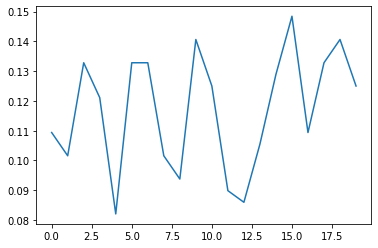

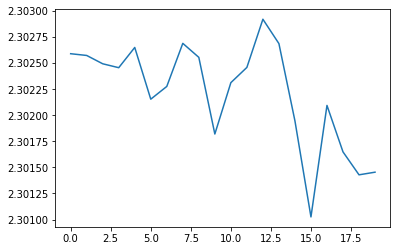

In [29]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)